In [1]:
import random
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

In [2]:
import torchxrayvision as xrv

In [3]:
"""
    PadChest dataset
    Hospital San Juan de Alicante – University of Alicante
    
    Dataset website:
    http://bimcv.cipf.es/bimcv-projects/padchest/
    
    Download full size images here:
    https://academictorrents.com/details/dec12db21d57e158f78621f06dcbe78248d14850
    
    Download resized (224x224) images here:
    https://academictorrents.com/details/e0aeda79626589f31e8bf016660da801f5add88e
"""
d_pc = xrv.datasets.PC_Dataset(imgpath="data/PC/images-224")


In [4]:
# Load model
model = xrv.models.DenseNet(num_classes=18, weights="all")

/usr/local/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torchxrayvision.models.DenseNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `

In [5]:
# Dataset info
d_pc

{'Atelectasis': {0.0: 59674, 1.0: 2441},
 'Cardiomegaly': {0.0: 56725, 1.0: 5390},
 'Consolidation': {0.0: 61621, 1.0: 494},
 'Edema': {0.0: 62007, 1.0: 108},
 'Effusion': {0.0: 60478, 1.0: 1637},
 'Emphysema': {0.0: 61569, 1.0: 546},
 'Fibrosis': {0.0: 61774, 1.0: 341},
 'Fracture': {0.0: 60450, 1.0: 1665},
 'Hernia': {0.0: 61127, 1.0: 988},
 'Infiltration': {0.0: 57677, 1.0: 4438},
 'Mass': {0.0: 61608, 1.0: 507},
 'Nodule': {0.0: 59921, 1.0: 2194},
 'Pleural_Thickening': {0.0: 60039, 1.0: 2076},
 'Pneumonia': {0.0: 60064, 1.0: 2051},
 'Pneumothorax': {0.0: 62017, 1.0: 98}}


PC_Dataset num_samples=62115

Showing X-Ray of IDX:  33634
Labels:
Atelectasis 0.0
Cardiomegaly 0.0
Consolidation 1.0
Edema 0.0
Effusion 0.0
Emphysema 0.0
Fibrosis 0.0
Fracture 0.0
Hernia 0.0
Infiltration 1.0
Mass 0.0
Nodule 0.0
Pleural_Thickening 0.0
Pneumonia 1.0
Pneumothorax 0.0


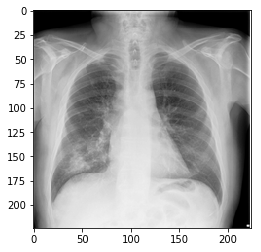

In [11]:
# Sample output
IMGIDX = random.randint(0, len(d_pc))

print("Showing X-Ray of IDX: ", IMGIDX,)
ximage = d_pc[IMGIDX]["PA"][0]
plt.imshow(ximage, cmap="Greys_r")
pcpathologies = d_pc.pathologies.copy()

print("Labels:")
for idx, pathology in enumerate(pcpathologies):
    print(pathology, d_pc.labels[IMGIDX][idx])

In [13]:
pcpathologies = sorted(d_pc.pathologies.copy())
default_pathologies = sorted(xrv.datasets.default_pathologies)

for i in range(10):
    imidx = random.randint(0, len(d_pc))
    print(imidx)    
    inferimage = torch.from_numpy(np.expand_dims(d_pc[imidx]["PA"], axis=0))
    
    conf = torch.nn.Softmax()(model(inferimage)).detach().numpy()[0]    
    pclabels = d_pc[imidx]["lab"].copy()
    
    print("Pathology Prob GT")
    for idx, pathology in enumerate(default_pathologies):
        try:
          print(pathology, "%.2f%%"%(conf[idx] * 100), pclabels[pcpathologies.index(pathology)])
        except ValueError:
          print(pathology, "%.2f%%"%(conf[idx] * 100), "NoLabel")
    
    print("\n")

58647
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':
Pathology Prob GT
Atelectasis 12.07% 0.0
Cardiomegaly 2.75% 0.0
Consolidation 16.96% 0.0
Edema 0.56% 0.0
Effusion 0.40% 0.0
Emphysema 0.46% 0.0
Enlarged Cardiomediastinum 0.65% NoLabel
Fibrosis 3.95% 0.0
Fracture 6.39% 0.0
Hernia 3.04% 0.0
Infiltration 3.59% 0.0
Lung Lesion 5.40% NoLabel
Lung Opacity 1.46% NoLabel
Mass 0.17% 0.0
Nodule 1.87% 0.0
Pleural_Thickening 8.09% 0.0
Pneumonia 27.68% 0.0
Pneumothorax 4.50% 0.0


41365
Pathology Prob GT
Atelectasis 12.48% 0.0
Cardiomegaly 2.92% 0.0
Consolidation 16.73% 0.0
Edema 0.63% 0.0
Effusion 0.37% 0.0
Emphysema 0.45% 0.0
Enlarged Cardiomediastinum 0.58% NoLabel
Fibrosis 4.61% 0.0
Fracture 6.05% 0.0
Hernia 3.14% 0.0
Infiltration 3.67% 0.0
Lung Lesion 4.96% NoLabel
Lung Opacity 1.75% NoLabel
Mass 0.18% 0.0
Nodule 1.90% 0.0
Ple

KeyboardInterrupt: 